<a href="https://colab.research.google.com/github/kennedy568/IP-Week-4./blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2021_03_Kennedy_Nganga_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Data Cleaning and Analysis - Autolib car-sharing service company

## 1.0 Importing our Libraries

In [1]:
#import pandas library as pd
import pandas as pd

#import numpy library as np
import numpy as np

#import datetime
from datetime import datetime
 


## 1.1 Reading the Dataset from our CSV file

In [2]:
URL = 'http://bit.ly/autolib_dataset'
Autolib_Data_Frame = pd.read_csv(URL)

## 1.2 Previewing our Dataset

In [40]:
Autolib_Data_Frame.head(2)

,Bluecar_Counter,Utilib_counter,Utilib_1.4_Counter,City,Kind,Postal_Code,Public_Name,Rental_Status,Slots,Station_Type,Subscription_status,hour,date
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,nonexistent,11,2018-04-08 11:43:00
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,nonexistent,7,2018-04-06 07:24:00


## 1.3 Accessing Information about our Dataset

In [4]:
#getting to know the number of columns and rows in the data set
Autolib_Data_Frame.shape

(5000, 25)

In [5]:
Autolib_Data_Frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

## 1.4 Cleaning our Dataset



### 1.41) Validity Analysis

In [6]:
to_drop = ['Cars','Displayed comment','Geo point','Scheduled at','Status','Address','Charging Status','Charge Slots','ID']
Autolib_Data_Frame.drop(to_drop, inplace=True, axis=1)

In [7]:
Autolib_Data_Frame.head()

,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Rental status,Slots,Station type,Subscription status,year,month,day,hour,minute
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,nonexistent,2018,4,8,11,43
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,nonexistent,2018,4,6,7,24
2,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,nonexistent,2018,4,3,20,14
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,nonexistent,2018,4,4,4,37
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,nonexistent,2018,4,8,17,23


In [39]:
#merging year, month and day as date.
Autolib_Data_Frame['date_Time'] = Autolib_Data_Frame['year'].astype(str) + Autolib_Data_Frame['month'].astype(str).str.zfill(2) + Autolib_Data_Frame['day'].astype(str).str.zfill(2)+ Autolib_Data_Frame['hour'].astype(str).str.zfill(2) +Autolib_Data_Frame['minute'].astype(str).str.zfill(2)
Autolib_Data_Frame.head(2)

KeyError: ignored

In [9]:
Autolib_Data_Frame['date']=pd.to_datetime(Autolib_Data_Frame['date_Time'])

In [10]:
to_drop = ['year','month','day','minute','date_Time',]
Autolib_Data_Frame.drop(to_drop, inplace=True, axis=1)

In [38]:
Autolib_Data_Frame.head(2)

,Bluecar_Counter,Utilib_counter,Utilib_1.4_Counter,City,Kind,Postal_Code,Public_Name,Rental_Status,Slots,Station_Type,Subscription_status,hour,date
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,nonexistent,11,2018-04-08 11:43:00
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,nonexistent,7,2018-04-06 07:24:00


In [12]:
#for i in Autolib_Data_Frame['date']:
#print(i)

### 1.42) Completeness Analysis


In [13]:
#looking for missing values 
Autolib_Data_Frame.isnull().any()

Bluecar counter        False
Utilib counter         False
Utilib 1.4 counter     False
City                   False
Kind                   False
Postal code            False
Public name            False
Rental status          False
Slots                  False
Station type           False
Subscription status    False
hour                   False
date                   False
dtype: bool

### 1.43) Consistency analysis

In [14]:
#looking for duplicates in the data frame
Autolib_Data_Frame.duplicated().sum()

0

### 1.44) Uniformity

In [15]:
Autolib_Data_Frame = Autolib_Data_Frame.rename(columns={'Bluecar counter':'Bluecar_Counter','Utilib counter':'Utilib_counter','Utilib 1.4 counter':'Utilib_1.4_Counter', 'Postal code':'Postal_Code', 'Public name':'Public_Name', 'Rental status': 'Rental_Status', 'Station type': 'Station_Type', 'Subscription status': 'Subscription_status'}) 

In [16]:
Autolib_Data_Frame.head(4)


,Bluecar_Counter,Utilib_counter,Utilib_1.4_Counter,City,Kind,Postal_Code,Public_Name,Rental_Status,Slots,Station_Type,Subscription_status,hour,date
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,nonexistent,11,2018-04-08 11:43:00
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,nonexistent,7,2018-04-06 07:24:00
2,3,0,2,Le Bourget,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,nonexistent,20,2018-04-03 20:14:00
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,nonexistent,4,2018-04-04 04:37:00


### 2.0 Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018

In [17]:
%matplotlib inline 

In [18]:
Auto_DF2 = Autolib_Data_Frame[(Autolib_Data_Frame.City == 'Paris')]

In [19]:
Auto_DF2.head()

,Bluecar_Counter,Utilib_counter,Utilib_1.4_Counter,City,Kind,Postal_Code,Public_Name,Rental_Status,Slots,Station_Type,Subscription_status,hour,date
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,nonexistent,11,2018-04-08 11:43:00
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,nonexistent,7,2018-04-06 07:24:00
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,nonexistent,4,2018-04-04 04:37:00
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,nonexistent,17,2018-04-08 17:23:00
5,0,0,0,Paris,STATION,75011,Paris/Voltaire/8,operational,4,station,nonexistent,7,2018-04-06 07:02:00


In [20]:
Auto_DF2['City'].unique().tolist()

['Paris']

In [21]:
Auto_DF2['Total_cars'] = Auto_DF2.iloc[:,0:3].sum(axis = 1)
Auto_DF2.tail(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Bluecar_Counter,Utilib_counter,Utilib_1.4_Counter,City,Kind,Postal_Code,Public_Name,Rental_Status,Slots,Station_Type,Subscription_status,hour,date,Total_cars
4997,1,0,0,Paris,STATION,75007,Paris/Bac/142,operational,4,station,nonexistent,7,2018-04-01 07:01:00,1
4999,4,0,0,Paris,STATION,75018,Paris/Henry Brisson/5,operational,0,station,nonexistent,10,2018-04-08 10:02:00,4


In [37]:
Auto_DF2.head(2)

,Bluecar_Counter,Utilib_counter,Utilib_1.4_Counter,City,Kind,Postal_Code,Public_Name,Rental_Status,Slots,Station_Type,Subscription_status,hour,date,Total_cars,sum_utilib
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,nonexistent,11,2018-04-08 11:43:00,0,0
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,nonexistent,7,2018-04-06 07:24:00,6,0


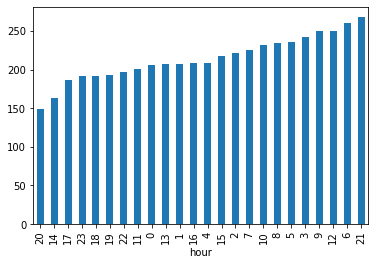

In [23]:
Auto_DF2.groupby(['hour'])['Bluecar_Counter'].sum().sort_values(ascending = True).plot(kind = 'bar')

In [42]:
print( 'The popular hour for picking up a Bluecar is', Auto_DF2.groupby(['hour'])['Bluecar_Counter'].sum().sort_values(ascending = True).head(1))

The popular hour for picking up a Bluecar is hour
20    149
Name: Bluecar_Counter, dtype: int64


### 3.0 What is the most popular hour for returning cars?

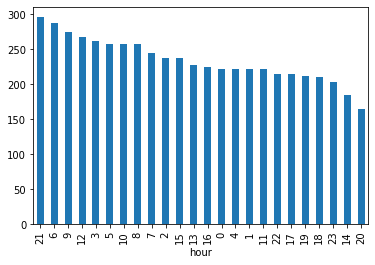

In [25]:
Auto_DF2.groupby(['hour'])['Total_cars'].sum().sort_values(ascending = False).plot(kind = 'bar')

In [26]:
print( 'The popular hour for returnining cars is',Auto_DF2.groupby(['hour'])['Total_cars'].sum().sort_values(ascending = False).head(1))

The popular hour for returnining cars is hour
21    296
Name: Total_cars, dtype: int64


### 4.0 What station is the most popular overall?

In [44]:
Auto_DF2.groupby(['Public_Name'])['Total_cars'].sum().sort_values(ascending = False).nsmallest(1)

Public_Name
Paris/Raspail/136    0
Name: Total_cars, dtype: int64

### 4.1 What station is the most popular:- At the most popular picking hour?

In [29]:
Auto_DF2.groupby(['Public_Name','hour'])['Total_cars'].sum().sort_values( ascending = True).head(1)

Public_Name                    hour
Paris/FrÃ©dÃ©rick LemaÃ®tre/5  19      0
Name: Total_cars, dtype: int64

In [30]:
Auto_DF2.pivot_table(values='Total_cars',index=['Public_Name','hour'],aggfunc=np.sum).sort_values(by='Total_cars',ascending=True).head(1)

,,Total_cars
Public_Name,hour,
Paris/FrÃ©dÃ©rick LemaÃ®tre/5,19,0


### 5.0 What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code:- Overall?

In [31]:
Auto_DF2.head()

,Bluecar_Counter,Utilib_counter,Utilib_1.4_Counter,City,Kind,Postal_Code,Public_Name,Rental_Status,Slots,Station_Type,Subscription_status,hour,date,Total_cars
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,nonexistent,11,2018-04-08 11:43:00,0
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,nonexistent,7,2018-04-06 07:24:00,6
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,nonexistent,4,2018-04-04 04:37:00,4
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,nonexistent,17,2018-04-08 17:23:00,3
5,0,0,0,Paris,STATION,75011,Paris/Voltaire/8,operational,4,station,nonexistent,7,2018-04-06 07:02:00,0


In [32]:
Auto_DF2.pivot_table(values='Bluecar_Counter',index=['Postal_Code','Public_Name'],aggfunc=np.sum).sort_values(by='Bluecar_Counter',ascending=0).head(1)

,,Bluecar_Counter
Postal_Code,Public_Name,
75011,Paris/Philippe Auguste/126,42


### 5.1 What postal code is the most popular for picking up Blue cars? Does the most popular station belong to that postal code:- At the most popular picking hour?

In [33]:
Auto_DF2.groupby(['Public_Name','hour'])['Total_cars'].sum().sort_values( ascending = True).head(1)

Public_Name                    hour
Paris/FrÃ©dÃ©rick LemaÃ®tre/5  19      0
Name: Total_cars, dtype: int64

### 6.0 Do the results change if you consider Utilib and Utilib 1.4 instead of Blue cars? 

In [41]:
Auto_DF2.head(2)

,Bluecar_Counter,Utilib_counter,Utilib_1.4_Counter,City,Kind,Postal_Code,Public_Name,Rental_Status,Slots,Station_Type,Subscription_status,hour,date,Total_cars,sum_utilib
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,nonexistent,11,2018-04-08 11:43:00,0,0
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,nonexistent,7,2018-04-06 07:24:00,6,0


In [35]:
Auto_DF2['sum_utilib']= Auto_DF2['Utilib_counter'] + Auto_DF2['Utilib_1.4_Counter']
Auto_DF2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Bluecar_Counter,Utilib_counter,Utilib_1.4_Counter,City,Kind,Postal_Code,Public_Name,Rental_Status,Slots,Station_Type,Subscription_status,hour,date,Total_cars,sum_utilib
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,operational,2,station,nonexistent,11,2018-04-08 11:43:00,0,0
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,nonexistent,7,2018-04-06 07:24:00,6,0
3,3,1,0,Paris,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,nonexistent,4,2018-04-04 04:37:00,4,1
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,nonexistent,17,2018-04-08 17:23:00,3,0
5,0,0,0,Paris,STATION,75011,Paris/Voltaire/8,operational,4,station,nonexistent,7,2018-04-06 07:02:00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,0,0,0,Paris,STATION,75013,Paris/Ivry/3,operational,6,station,nonexistent,23,2018-04-09 23:01:00,0,0
4994,0,0,0,Paris,STATION,75010,Paris/Rocroy/15,operational,1,station,nonexistent,20,2018-04-01 20:49:00,0,0
4996,4,0,0,Paris,STATION,75015,Paris/Dantzig/37,operational,2,station,nonexistent,16,2018-04-04 16:56:00,4,0
4997,1,0,0,Paris,STATION,75007,Paris/Bac/142,operational,4,station,nonexistent,7,2018-04-01 07:01:00,1,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


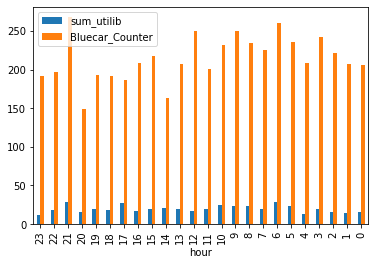

In [36]:
Auto_DF2.groupby('hour')['sum_utilib', 'Bluecar_Counter'].sum().sort_values(by='hour', ascending = False).plot(kind = 'bar')

In [48]:
!!git clone https://github.com/kennedy568/IP-week-4.git


["Cloning into 'IP-week-4'...",
 'warning: You appear to have cloned an empty repository.']